<div style="text-align:center">
    <img src="L.png" width="200" alt="Lxgacy Logo">
    <h3>Written by Lxgacy</h3>
</div>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [ ]:
# Windows Installation Instructions
! py -m pip install yfinance pandas requests beautifulsoup4 matplotlib

# For macOS/Linux:
# pip install yfinance pandas requests beautifulsoup4 matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 11.5 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 18.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 25.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 22.8 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [11]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import re

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [12]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [13]:
def make_graph(stock_data, revenue_data, stock):
    # Create a figure with 2 rows for stock price and revenue
    plt.figure(figsize=(12, 10))
    
    # Filter data to match the requirements (up to June 2021)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    # Convert dates to datetime format
    stock_dates = pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True)
    revenue_dates = pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True)
    
    # Plot stock price
    plt.subplot(2, 1, 1)
    plt.plot(stock_dates, stock_data_specific.Close.astype("float"))
    plt.title(f"{stock} - Historical Share Price", fontsize=14)
    plt.ylabel("Price ($US)")
    plt.grid(True)
    
    # Plot revenue
    plt.subplot(2, 1, 2)
    plt.plot(revenue_dates, revenue_data_specific.Revenue.astype("float"))
    plt.title(f"{stock} - Historical Revenue", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Revenue ($US Millions)")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

Use the make_graph function that we've already defined. You'll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don't need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [14]:
tesla = yf.Ticker("TSLA")
print("Tesla Ticker object created.")

Tesla Ticker object created.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [15]:
tesla_data = tesla.history(period="max")
print("Tesla stock data extracted.")

Tesla stock data extracted.


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [16]:
tesla_data.reset_index(inplace=True)
print("First 5 rows of Tesla stock data:")
tesla_data.head()

First 5 rows of Tesla stock data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [25]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text
print("Tesla revenue data downloaded.")

Tesla revenue data downloaded.


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [26]:
soup = BeautifulSoup(html_data, "html.parser")
print("HTML data parsed with BeautifulSoup.")

HTML data parsed with BeautifulSoup.


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [31]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the table with Tesla Quarterly Revenue
tables = soup.find_all("table")
for index, table in enumerate(soup.find_all("table")):
    if ("Tesla Quarterly Revenue" in str(table)):
        tesla_revenue_table = table

# Extract data from the table
for row in tesla_revenue_table.tbody.find_all("tr"):
    col = row.find_all("td")
    if len(col) != 0:
        date = col[0].text
        revenue = col[1].text
        tesla_revenue = tesla_revenue._append({"Date": date, "Revenue": revenue}, ignore_index=True)

print("Tesla revenue data extracted.")
tesla_revenue.head()

Tesla revenue data extracted.


,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [32]:
# Inspect a few revenue values to see the format
print("Sample revenue values before cleaning:")
print(tesla_revenue['Revenue'].head().values)

# Clean the revenue data by removing all non-numeric characters
def clean_revenue(revenue_str):
    # Remove all non-numeric characters except decimal points
    return re.sub(r'[^0-9.]', '', revenue_str)

tesla_revenue["Revenue"] = tesla_revenue['Revenue'].apply(clean_revenue)

# Verify the cleaning worked
print("\nSample revenue values after cleaning:")
print(tesla_revenue['Revenue'].head().values)
print("All non-numeric characters removed from Revenue column.")

Sample revenue values before cleaning:
['$21,454' '$16,934' '$18,756' '$17,719' '$13,757']

Sample revenue values after cleaning:
['21454' '16934' '18756' '17719' '13757']
All non-numeric characters removed from Revenue column.


Execute the following lines to remove an null or empty strings in the Revenue column.


In [33]:
# Remove null values and empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print("Null values and empty strings removed.")

# Convert Revenue column to float to ensure it's numeric
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"])
print("Revenue column converted to numeric type.")

Null values and empty strings removed.
Revenue column converted to numeric type.


Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [34]:
print("Last 5 rows of Tesla revenue data:")
tesla_revenue.tail()

Last 5 rows of Tesla revenue data:


,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [35]:
gme = yf.Ticker("GME")
print("GameStop Ticker object created.")

GameStop Ticker object created.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [36]:
gme_data = gme.history(period="max")
print("GameStop stock data extracted.")

GameStop stock data extracted.


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [37]:
gme_data.reset_index(inplace=True)
print("First 5 rows of GameStop stock data:")
gme_data.head()

First 5 rows of GameStop stock data:


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [38]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text
print("GameStop revenue data downloaded.")

GameStop revenue data downloaded.


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [39]:
soup = BeautifulSoup(html_data_2, "html.parser")
print("HTML data parsed with BeautifulSoup.")

HTML data parsed with BeautifulSoup.


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [40]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the table with GameStop Quarterly Revenue
tables = soup.find_all("table")
for index, table in enumerate(soup.find_all("table")):
    if ("GameStop Quarterly Revenue" in str(table)):
        gme_revenue_table = table

# Extract data from the table
for row in gme_revenue_table.tbody.find_all("tr"):
    col = row.find_all("td")
    if len(col) != 0:
        date = col[0].text
        revenue = col[1].text
        gme_revenue = gme_revenue._append({"Date": date, "Revenue": revenue}, ignore_index=True)

print("GameStop revenue data extracted.")
gme_revenue.head()

GameStop revenue data extracted.


,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


In [41]:
# Inspect a few revenue values to see the format
print("Sample revenue values before cleaning:")
print(gme_revenue['Revenue'].head().values)

# Clean the revenue data by removing all non-numeric characters
gme_revenue["Revenue"] = gme_revenue['Revenue'].apply(clean_revenue)

# Verify the cleaning worked
print("\nSample revenue values after cleaning:")
print(gme_revenue['Revenue'].head().values)
print("All non-numeric characters removed from Revenue column.")

# Remove null values and empty strings
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
print("Null values and empty strings removed.")

# Convert Revenue column to float to ensure it's numeric
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
print("Revenue column converted to numeric type.")

Sample revenue values before cleaning:
['$1,021' '$2,194' '$1,439' '$1,286' '$1,548']

Sample revenue values after cleaning:
['1021' '2194' '1439' '1286' '1548']
All non-numeric characters removed from Revenue column.
Null values and empty strings removed.
Revenue column converted to numeric type.


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
print("Last 5 rows of GameStop revenue data:")
gme_revenue.tail()

Last 5 rows of GameStop revenue data:


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


Plotting Tesla stock graph...


C:\Users\luan_\AppData\Local\Temp\ipykernel_11156\1362473511.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  stock_dates = pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True)
C:\Users\luan_\AppData\Local\Temp\ipykernel_11156\1362473511.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  revenue_dates = pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True)


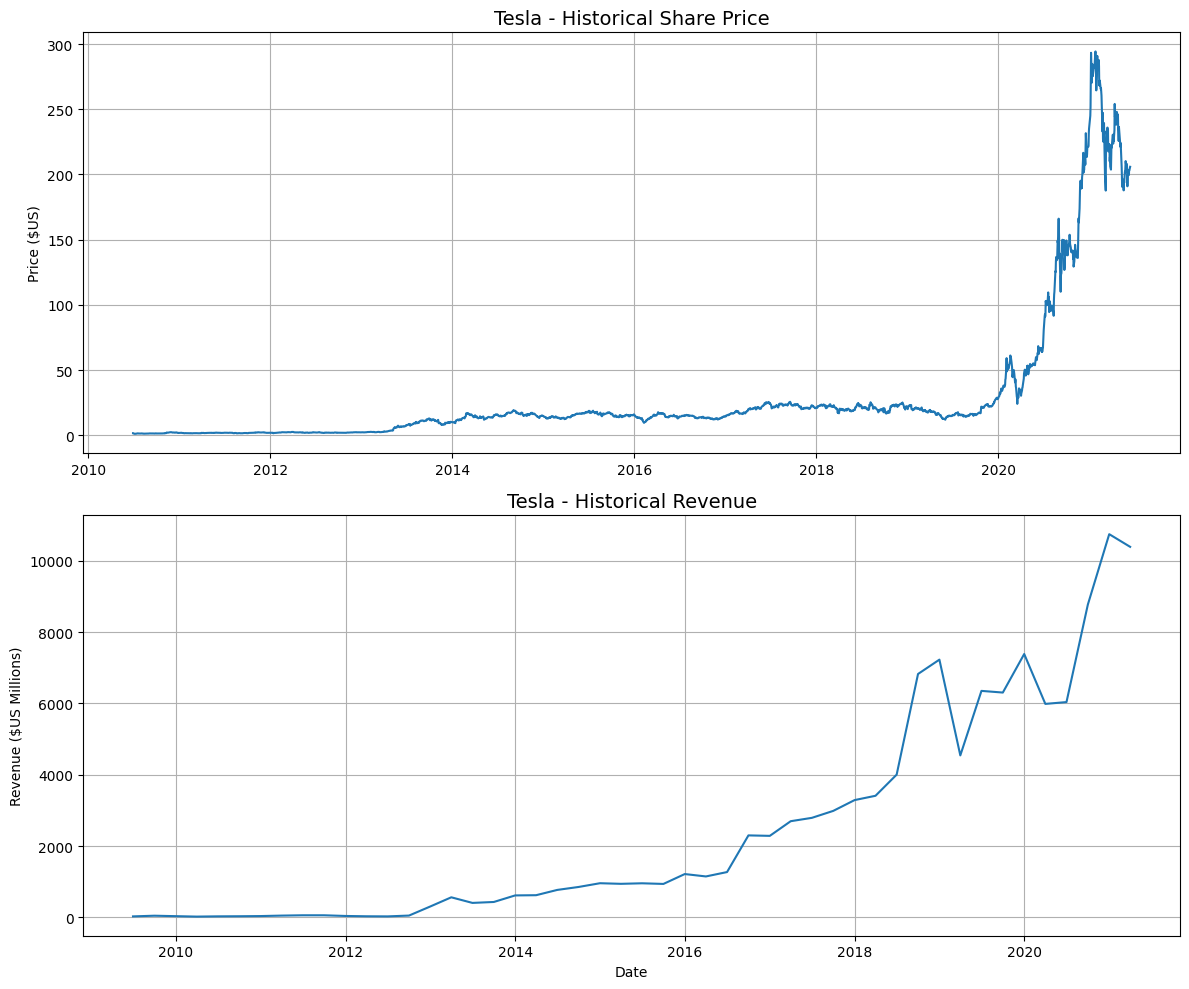

In [42]:
print("Plotting Tesla stock graph...")
make_graph(tesla_data, tesla_revenue, "Tesla")

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


Plotting GameStop stock graph...


C:\Users\luan_\AppData\Local\Temp\ipykernel_11156\1362473511.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  stock_dates = pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True)
C:\Users\luan_\AppData\Local\Temp\ipykernel_11156\1362473511.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  revenue_dates = pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True)


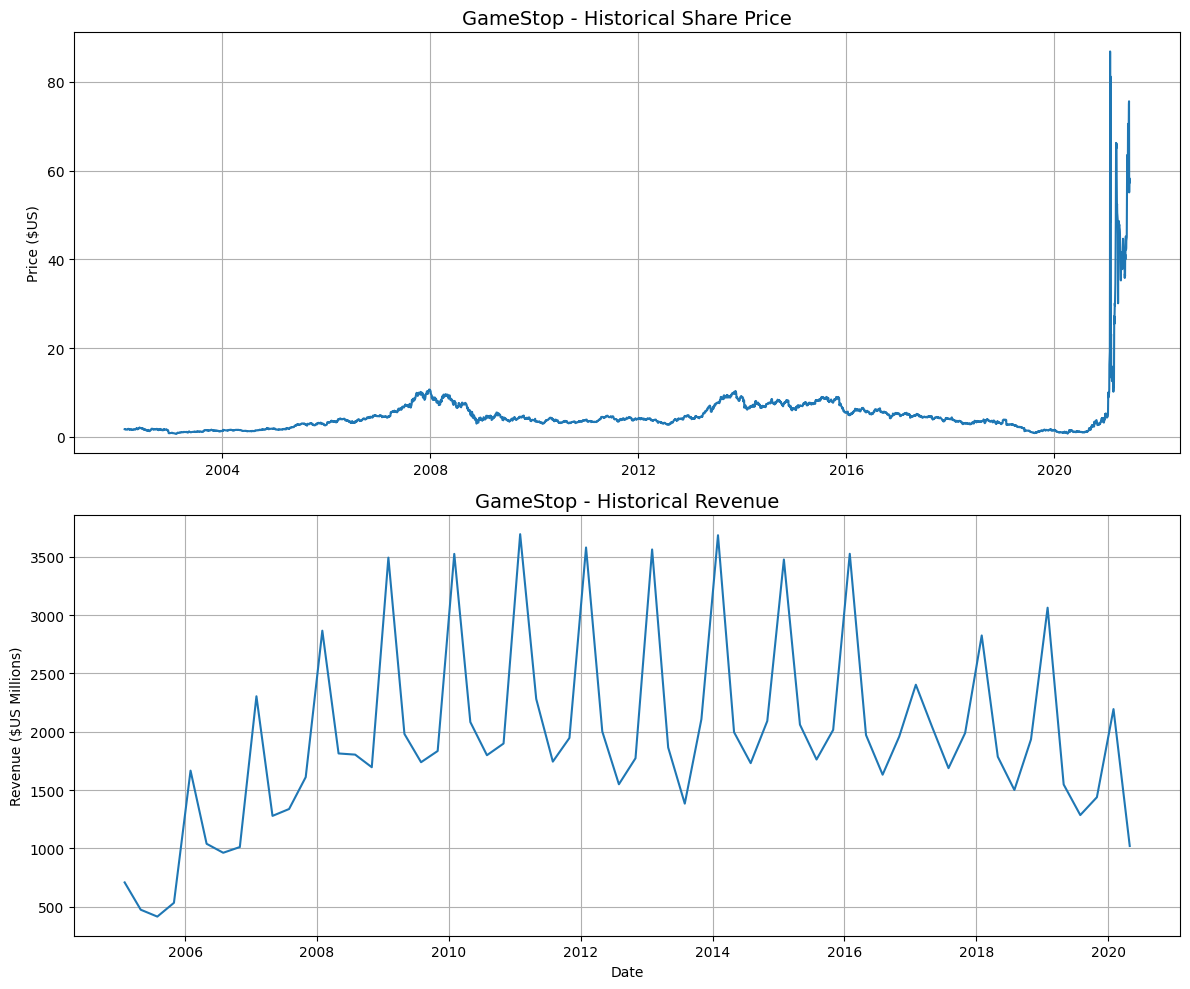

In [43]:
print("Plotting GameStop stock graph...")
make_graph(gme_data, gme_revenue, "GameStop")

## Question 7: Sharing your Assignment Notebook


Upload your completed notebook to GitHub and submit the GitHub repository link to Coursera for peer review.

### GitHub Repository Setup Instructions:

1. Create a new GitHub repository
2. Upload this completed notebook
3. Include the L.png logo file in your repository
4. Make sure all visualizations are properly displayed
5. Submit the GitHub repository URL to Coursera for peer review
